# Example2_MultiSetupPoSER

In [1]:
import os
import sys
# Add the directory we executed the script from to path:
sys.path.insert(0, os.path.realpath('__file__'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyoma2.algorithm import FDD_algo,FSDD_algo,SSIcov_algo
from pyoma2.OMA import MultiSetup_PoSER, SingleSetup

For the poSER approach, after importing the necessary modules and data, we need to create as many single setup class instances as there are datasets available.

In [2]:
# import data files
set1 = np.load("../src/pyoma2/test_data/3SL/set1.npy", allow_pickle=True)
set2 = np.load("../src/pyoma2/test_data/3SL/set2.npy", allow_pickle=True)
set3 = np.load("../src/pyoma2/test_data/3SL/set3.npy", allow_pickle=True)

The process for obtaining the modal properties from each setup remains the same as described in the example for the single setup. 

2024-02-23 15:02:34,948 - pyoma2.OMA - INFO - Running SSIcov1... (OMA:148)


50.0 50.0 50.0


2024-02-23 15:02:35,718 - pyoma2.functions.SSI_funct - INFO - SSI for increasing model order... (SSI_funct:278)
100%|████████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<00:00, 6005.53it/s]
2024-02-23 15:02:36,304 - pyoma2.OMA - INFO - all done (OMA:127)
2024-02-23 15:02:36,305 - pyoma2.OMA - INFO - Running SSIcov2... (OMA:148)
2024-02-23 15:02:37,125 - pyoma2.functions.SSI_funct - INFO - SSI for increasing model order... (SSI_funct:278)
100%|████████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<00:00, 7714.67it/s]
2024-02-23 15:02:37,678 - pyoma2.OMA - INFO - all done (OMA:127)
2024-02-23 15:02:37,679 - pyoma2.OMA - INFO - Running SSIcov3... (OMA:148)
2024-02-23 15:02:38,525 - pyoma2.functions.SSI_funct - INFO - SSI for increasing model order... (SSI_funct:278)
100%|████████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<00:00, 6749.01it/s]
2024-02-23 15:02:39,086 

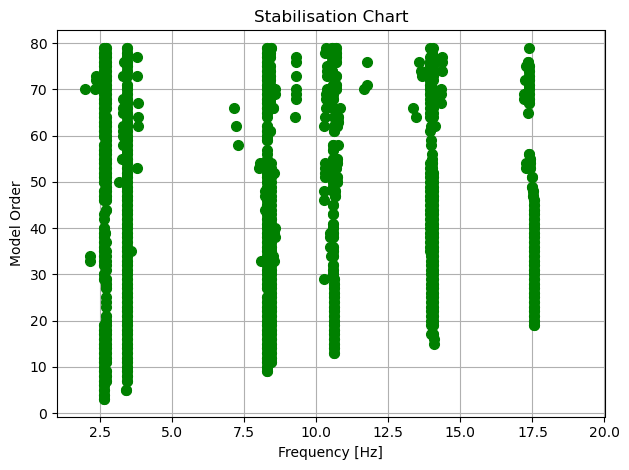

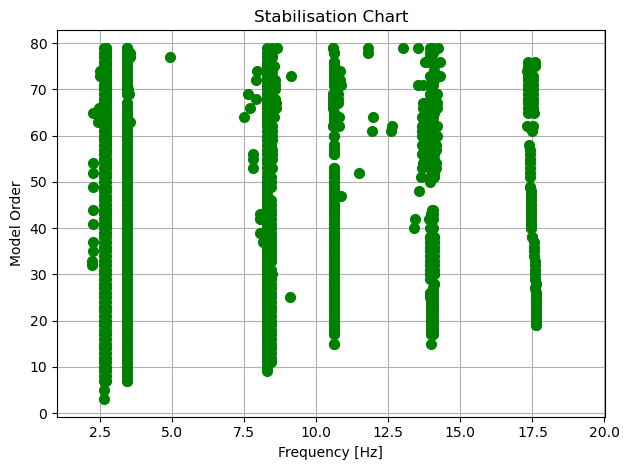

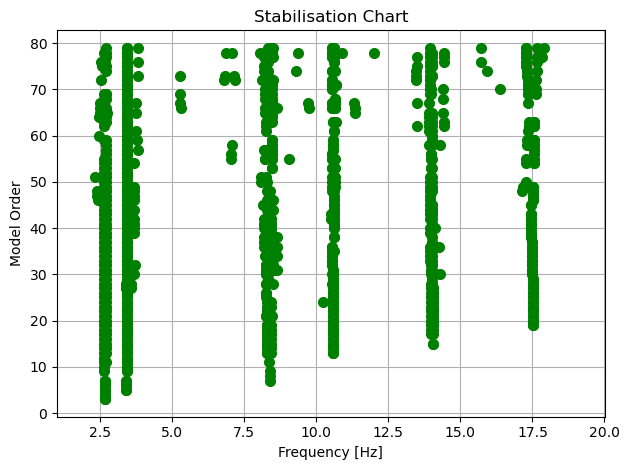

In [3]:
# create single setup
ss1 = SingleSetup(set1, fs=100)
ss2 = SingleSetup(set2, fs=100)
ss3 = SingleSetup(set3, fs=100)

# Detrend and decimate
ss1.decimate_data(q=2)
ss2.decimate_data(q=2)
ss3.decimate_data(q=2)
print(ss1.fs, ss2.fs, ss3.fs)

# Initialise the algorithms for setup 1
ssicov1 = SSIcov_algo(name="SSIcov1", method="cov_mm", br=50, ordmax=80)
# Add algorithms to the class
ss1.add_algorithms(ssicov1)
ss1.run_all()

# Initialise the algorithms for setup 2
ssicov2 = SSIcov_algo(name="SSIcov2", method="cov_mm", br=50, ordmax=80)
ss2.add_algorithms(ssicov2)
ss2.run_all()

# Initialise the algorithms for setup 2
ssicov3 = SSIcov_algo(name="SSIcov3", method="cov_mm", br=50, ordmax=80)
ss3.add_algorithms(ssicov3)
ss3.run_all()

# Plot stabilisation chart
fig, ax = ssicov1.plot_STDiag(freqlim=(1,20))
fig1, ax1 = ssicov2.plot_STDiag(freqlim=(1,20))
fig2, ax2 = ssicov3.plot_STDiag(freqlim=(1,20))

ss1.MPE(
    "SSIcov1",
    sel_freq=[2.63, 2.69, 3.43, 8.29, 8.42, 10.62, 14.00, 14.09, 17.57],
    order=50)
ss2.MPE(
    "SSIcov2",
    sel_freq=[2.63, 2.69, 3.43, 8.29, 8.42, 10.62, 14.00, 14.09, 17.57],
    order=40)
ss3.MPE(
    "SSIcov3",
    sel_freq=[2.63, 2.69, 3.43, 8.29, 8.42, 10.62, 14.00, 14.09, 17.57],
    order=40)

After analyzing all datasets, the **MultiSetup_PoSER** class can be instantiated by passing the processed single setup and the lists of reference indices. Subsequently, the **merge_results()** method is used to combine the results.

In [4]:
# reference indices
ref_ind = [[0, 1, 2], [0, 1, 2], [0, 1, 2]]
# Creating Multi setup
msp = MultiSetup_PoSER(ref_ind=ref_ind, single_setups=[ss1, ss2, ss3])

# Merging results from single setups
result = msp.merge_results()

# dictionary of merged results
res_ssicov = dict(result[SSIcov_algo.__name__])

2024-02-23 15:02:40,294 - pyoma2.OMA - INFO - Merging SSIcov_algo results (OMA:1085)
2024-02-23 15:02:40,295 - pyoma2.OMA - INFO - Merging SSIcov1 results (OMA:1091)
2024-02-23 15:02:40,296 - pyoma2.OMA - INFO - Merging SSIcov2 results (OMA:1091)
2024-02-23 15:02:40,297 - pyoma2.OMA - INFO - Merging SSIcov3 results (OMA:1091)


Once the class has been instantiated we can define the "global" geometry on it and then plot or animate the mode shapes

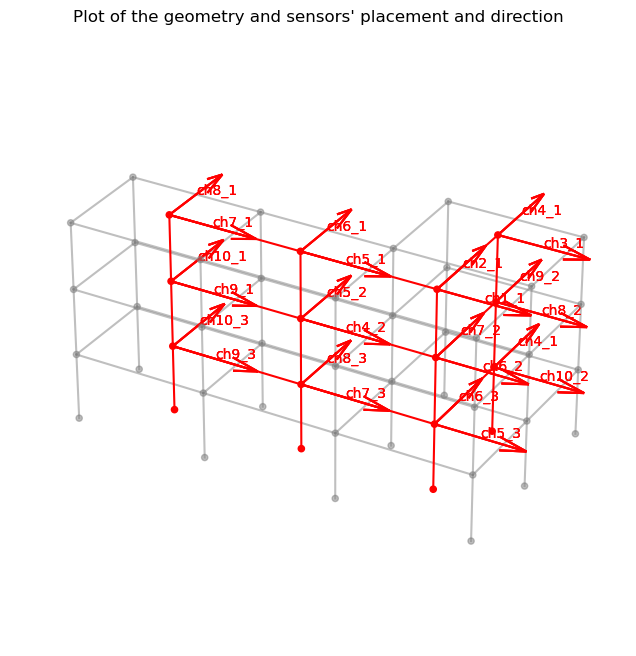

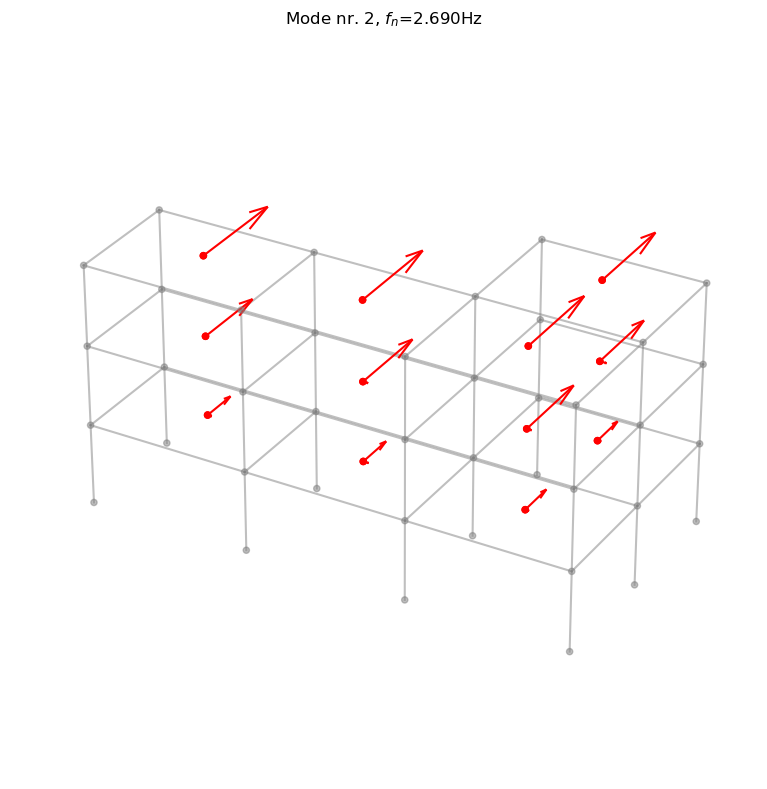

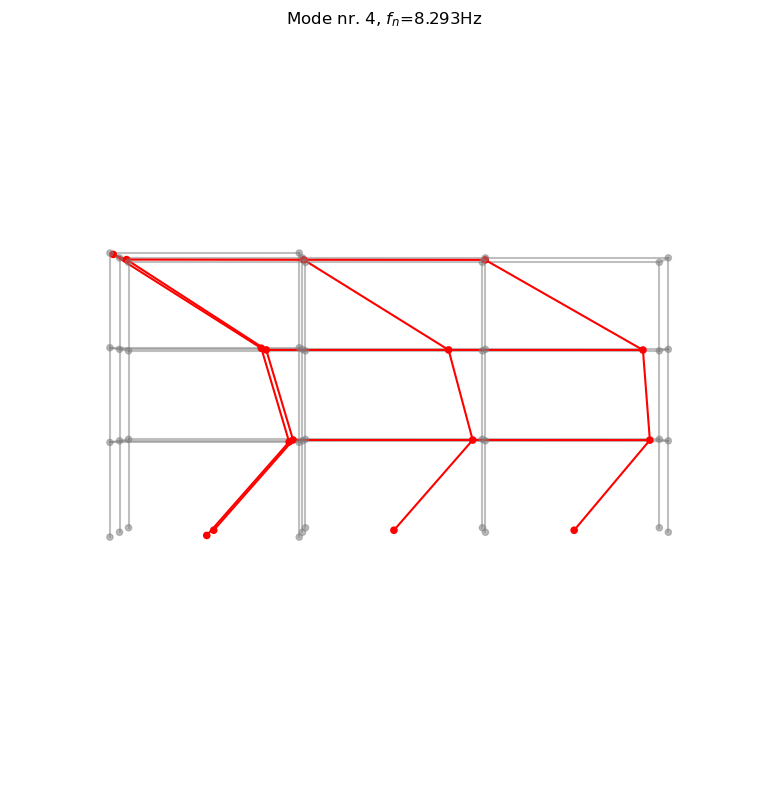

In [5]:
# import geometry files
# Names of the channels
Names = [
    ["ch1_1","ch2_1","ch3_1","ch4_1","ch5_1","ch6_1","ch7_1","ch8_1","ch9_1","ch10_1"],
    ["ch1_2","ch2_2","ch3_2","ch4_2","ch5_2","ch6_2","ch7_2","ch8_2","ch9_2","ch10_2"],
    ["ch1_3","ch2_3","ch3_3","ch4_3","ch5_3","ch6_3","ch7_3","ch8_3","ch9_3","ch10_3"]]
# Background
BG_nodes = np.loadtxt("../src/pyoma2/test_data/3SL/BG_nodes.txt")
BG_lines = np.loadtxt("../src/pyoma2/test_data/3SL/BG_lines.txt").astype(int)
# Geometry 1
sens_coord = pd.read_csv("../src/pyoma2/test_data/3SL/sens_coord.txt", sep="\t")
sens_dir = np.loadtxt("../src/pyoma2/test_data/3SL/sens_dir.txt")
# Geometry 2
sens_lines = np.loadtxt("../src/pyoma2/test_data/3SL/sens_lines.txt").astype(int)
pts_coord = pd.read_csv("../src/pyoma2/test_data/3SL/pts_coord.txt", sep="\t")
sens_map = pd.read_csv("../src/pyoma2/test_data/3SL/sens_map.txt", sep="\t")
sens_sign = pd.read_csv("../src/pyoma2/test_data/3SL/sens_sign.txt", sep="\t")

# Define geometry1
msp.def_geo1(
    Names,  # Names of the channels
    sens_coord,  # coordinates of the sensors
    sens_dir,  # sensors' direction
    bg_nodes=BG_nodes,  # BG nodes
    bg_lines=BG_lines,) # BG lines

# Define geometry 2
msp.def_geo2(
    Names,  # Names of the channels
    pts_coord,
    sens_map,
    order_red="xy",
    sens_sign=sens_sign,
    sens_lines=sens_lines,
    bg_nodes=BG_nodes,
    bg_lines=BG_lines)


# Plot the geometry
fig3, ax3 = msp.plot_geo2(scaleF=2)

# define results variable
#algoRes = result[SSIcov_algo.__name__]
algoRes = result["SSIcov_algo"]

# Plot mode 2 (geometry 1)
fig4, ax4 = msp.plot_mode_g1(
    Algo_Res=algoRes, Geo1=msp.Geo1, mode_numb=2, view="3D", scaleF=2)

# Plot mode 3 (geometry 2)
fig5, ax5 = msp.plot_mode_g2(
    Algo_Res=algoRes, Geo2=msp.Geo2, mode_numb=4, view="xz", scaleF=3)

In [6]:
algoRes.Fn

array([ 2.63245926,  2.69030811,  3.4256547 ,  8.29328508,  8.42526299,
       10.60096486, 13.99307818, 14.09286017, 17.46931459])